
# ANÁLISIS DESCRIPTIVO





#### **Grupo**

*   Lorena Peñuela Cantor
*   Miguel Leon Garcia
*   Daniel Jimenez Riveros

**Objetivos:**


*   Realizar un análisis descriptivo del conjunto de datos
*   Realizar una prueba de hipótesis de Fetos en situación Normal vs Patólogicos a partir de la Frecuencia Cardiaca Fetal Inicial (FCF)
*   Realizar un análisis ANOVA para las tres clases Normal, Sospechoso y Patólogico
*   Concluir las hipótesis basado en los resultados, para poder definir los pasos a seguir





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install pandas-profiling==2.7.1
#Instalar versión compatible de pandas profiling

     |████████████████████████████████| 252 kB 7.7 MB/s 
     |████████████████████████████████| 675 kB 41.6 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
     |████████████████████████████████| 3.1 MB 35.7 MB/s 
     |████████████████████████████████| 812 kB 33.3 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f1a9d5a48a00e75452f4489fcf27fd7eeb32949106fd00ec5d2e27e3e08b24b3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=d19115fd3477085182aa0f3df2b49db015cfc94d509e9485d50bb80e46976979
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [ ]:
# Importar las librerías necesarias 
# Librería para manejo de datos
import pandas as pd
# Librerías para graficar
# El uso de plotly permite analizar los gráficos pasando el mouse sobre ellas
# también se puede redimensionar el gráfico a conveniencia
import plotly.express as px
# Gráficas estáticas
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
# Librería para perfilamiento
import pandas_profiling
#librería para prueba t
from scipy.stats import ttest_ind
#Calcular p valor de la F
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **1. Lectura de Datos**

In [ ]:
# cargar los datos en csv
data= pd.read_csv('/content/drive/MyDrive/CDA_Proyecto/Entrega1/fetal_health.csv',
                  sep=',', #Parámetro de separación de datos
                  encoding='utf-8' #Codificación de datos
                 )
#visualizar los primeros registros
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **2. Análisis univariado**
Encontrar características de las variables fetal_health y baseline value, las cuales son de interés en nuestra hipótesis

In [ ]:
#Creamos la función de decodificar para el campo fetal_health
def cat_salud(salud):
    if salud==1: val="Normal"
    elif salud==2: val="Sospechoso"
    elif salud==3: val="Patologico"
    return val

In [ ]:
#Se afecta conjunto de datos
data['fetal_health']=data['fetal_health'].apply(cat_salud)
data['fetal_health']

0       Sospechoso
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
2121    Sospechoso
2122    Sospechoso
2123    Sospechoso
2124    Sospechoso
2125        Normal
Name: fetal_health, Length: 2126, dtype: object

In [ ]:
## Tabla de frecuencia univariada
#Se va a realizar una tabla para analizar la salud del feto en los datos
# Frecuencia absoluta
frec_data=data['fetal_health'].value_counts().reset_index()
frec_data.head()

,index,fetal_health
0,Normal,1655
1,Sospechoso,295
2,Patologico,176


In [ ]:
#frecuencia relativa
frec_data['porcentaje_fetal_health']=frec_data['fetal_health'].apply(lambda x: x/frec_data['fetal_health'].sum())
# frecuencia absoluta y relativa acumulada con cumsum()
# absoluta acumulada
frec_data['acumulada_fetal_health']=frec_data['fetal_health'].cumsum()
# relativa acumulada
frec_data['acumulada_procentaje_fetal_health']=frec_data['porcentaje_fetal_health'].cumsum()
frec_data.head(5)

,index,fetal_health,porcentaje_fetal_health,acumulada_fetal_health,acumulada_procentaje_fetal_health
0,Normal,1655,0.778457,1655,0.778457
1,Sospechoso,295,0.138758,1950,0.917215
2,Patologico,176,0.082785,2126,1.000000


Se observa que tenemos diferencias considerables en la cantidad de datos de cada una de las clases. Es posible que tengamos problemas de desbalanceo de datos más adelante, esto se confirma a través del siguiente diagrama de barras:

In [ ]:
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_health = data['fetal_health'].value_counts().reset_index()
# cambiamos el nombre de las columnas
data_health.columns=['fetal_health','count']
fig = px.bar(data_health, x='fetal_health', y='count')
fig.show()

In [ ]:
#Medidas de tendencia central
#Media
print('Media o promedio')
print(data['baseline value'].mean())
#Moda
print('Moda')
print(data['baseline value'].mode()[0])
#Mediana
print('Mediana')
print(data['baseline value'].median())

Media o promedio
133.3038570084666
Moda
133.0
Mediana
133.0


Para los valores de FCF se observa a través de las medidas de tendencia central que parece tener una distribución simétrica, por que sus valores tienden a ser iguales, esto se observa mejor en el siguiente histograma:

In [ ]:
fig = px.histogram(data, x="baseline value")
fig.show()

Es importante identificar si existen atípicos en los datos recolectados de FCF, a través del siguiente diagrama de caja, se observa que no existen datos atípicos notorios.

In [ ]:
## Diagramas un box plot
#Revisar los ouliers(datos atípicos de la distribución de longitud del producto)
fig = px.box(data, y="baseline value")
fig.show()

# **3. Análisis bivariado**

Encontrar posibles relaciones entre las variables fetal_health y baseline value, las cuales son de interés en nuestra hipótesis

In [ ]:
# Resumen de información a graficar
data_fcf=data.groupby(['fetal_health','baseline value']).count().reset_index()[['fetal_health','baseline value','fetal_movement']]
data_fcf.columns=['fetal_health','baseline value','count']
data_fcf.head(5)

,fetal_health,baseline value,count
0,Normal,106.0,7
1,Normal,110.0,15
2,Normal,112.0,16
3,Normal,114.0,11
4,Normal,115.0,28


In [ ]:
#Gráfico de barra
fig = px.bar(data_fcf, x="fetal_health", y="count", color="baseline value", title="Gráfico de FCF y salud del bebe")
fig.show()

Se observa en el gráfico bivariado anterior que existen valores altos de FCF tanto para fetos clasificados como Normal como para los que tienen las categorías Patologico y sospechoso.
Sin embargo, pareciera que los valores bajos de FCF solo se asocian (al menos de forma más clara), con la categoría Normal

# **4. Perfilamiento de Datos**
La idea es poder tener un panorama más claro de cada variable que hace parte del conjunto de datos.

In [ ]:
perfilamiento=pandas_profiling.ProfileReport(data)
perfilamiento

Output hidden; open in https://colab.research.google.com to view.

# **5. Prueba t**
Teniendo en cuenta las hipótesis a analizar: 
--


*   H0: El promedio de la FCF en el grupo Normal y en el grupo Patológico es igual
*   H1: El promedio de la FCF en el grupo Normal y en el grupo Patológico NO es igual 

 


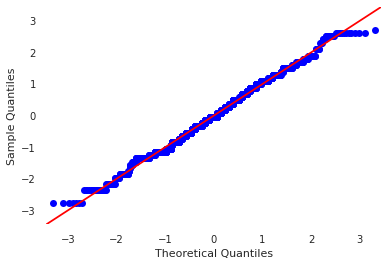

In [ ]:
fig = sm.qqplot(data['baseline value'], stats.t, fit=True, line="45")
plt.show()

**Explicar gráfica**

In [ ]:
#Mostrar promedio de Normal y Patologico
health_n=data[data['fetal_health']=='Normal']['baseline value']
health_p=data[data['fetal_health']=='Patologico']['baseline value']
print('Promedio Normal: '+str(health_n.mean()))
print('Promedio Patologico: '+str(health_p.mean()))

Promedio Normal: 131.98187311178248
Promedio Patologico: 131.6875


In [ ]:
#valor de t y p 
ttest,pval = ttest_ind(health_n,health_p)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: 0.3927937067140132
Valor p: 0.6945176260355097


In [ ]:
# Regla de decisión si el p valor es menor que la significancia escogida 
confianza=0.95
significancia=1-confianza
# Si se tiene menor valor se rechaza la hipótesis nula
if pval<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

No rechazar hipótesis nula


En este caso no podemos rechazar que el promedio de la FCF en el grupo Normal y en el grupo Patológico es igual, pero esto no indica que si lo sean. Simplemente no existe evidencia estadistica que nos permita rechazar la hipótesis nula



# **5. ANOVA**
Teniendo en cuenta el resultado anterior, queremos saber que pasa con la clase Sospechoso. 
Para ello establecemos las siguientes hipótesis:

*   H0: El promedio de la FCF en todos los grupos es igual
*   H1: El promedio de la FCF en todos los grupos NO es igual
 


In [ ]:
# Crear la estructura de tabla ANOVA 
data_col = [['SSA', '', '', '', '', ''], ['SSE', '', '', '', '', ''], ['Total', '', '', '', '', '']] 
anova_tabla = pd.DataFrame(data_col, columns = ['Fuente de variación', 'SS', 'gdl', 'MS', 'F', 'P-valor']) 
anova_tabla.set_index('Fuente de variación', inplace = True)
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,,,,,
SSE,,,,,
Total,,,,,


In [ ]:
# Calcular la SSA y actualizamos la tabla
promedio_fcf = data['baseline value'].mean()
SSA = data.groupby('fetal_health').count() * (data.groupby('fetal_health').mean() - promedio_fcf)**2
anova_tabla.at['SSA', 'SS'] = SSA['baseline value'].sum()

# Calculas la SSE y actualizar en la tabla
SSE = (data.groupby('fetal_health').count() - 1) * data.groupby('fetal_health').std()**2
anova_tabla.at['SSE', 'SS'] = SSE['baseline value'].sum()

# Calcular SST y actualizar en la tabla
SST = SSA['baseline value'].sum() + SSE['baseline value'].sum()
anova_tabla.at['Total', 'SS']= SST

In [ ]:
# Calcular los grados de libertad
anova_tabla['gdl']['SSA'] = data['fetal_health'].nunique() - 1
anova_tabla['gdl']['SSE'] = data.shape[0] - data['fetal_health'].nunique()
anova_tabla['gdl']['Total'] = data.shape[0] - 1

In [ ]:
# Calcular MS
anova_tabla['MS'] = anova_tabla['SS'] / anova_tabla['gdl']

# Calcular F 
F = anova_tabla['MS']['SSA'] / anova_tabla['MS']['SSE']
anova_tabla.at['SSA','F'] = F


# Calcular p-valor
anova_tabla.at['SSA','P-valor'] = 1 - stats.f.cdf(F, anova_tabla.at['SSA','gdl'], anova_tabla.at['SSE','gdl'])

# Visualizar tabla ANOVA
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,24072.8,2,12036.4,140.621,1.11022e-16
SSE,181717,2123,85.5944,,
Total,205790,2125,96.8422,,


In [ ]:
# Evaluar la hipótesis con un nivel de confianza del 95% y significancia del 5%
alpha=0.05 #Establecer la significancia
# Evaluar la hipótesis
print("Usar el P-valor para decidir sobre la hipótesis")
if anova_tabla.at['SSA','P-valor'] <= alpha:
    conclusion = "Se rechaza hipótesis nula "
else:
    conclusion = "No se rechaza hipótesis nula "
print(conclusion)
print("Valor F es:", anova_tabla['F']['SSA'], " y el P-valor es:", anova_tabla['P-valor']['SSA'])  

Usar el P-valor para decidir sobre la hipótesis
Se rechaza hipótesis nula 
Valor F es: 140.6210755419009  y el P-valor es: 1.1102230246251565e-16


Al analizar todos los grupos, se rechaza la hipótesis nula, indicando que todos los grupos no tienen un promedio igual; esto pasa cuando se incluye en el análisis a la clase Sospechoso